<a href="https://colab.research.google.com/github/nnilayy/Regression-Notebook/blob/main/RegressionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [76]:
# train=pd.read_csv("/content/train.csv")
# test=pd.read_csv("/content/train.csv")

In [77]:
df=pd.read_csv("/content/USA_Housing.csv")
df.shape

(5000, 7)

In [78]:
df.drop(['Address'],axis=1,inplace=True)

In [79]:
X=df.drop('Price',axis=1)
y=df['Price']

In [80]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

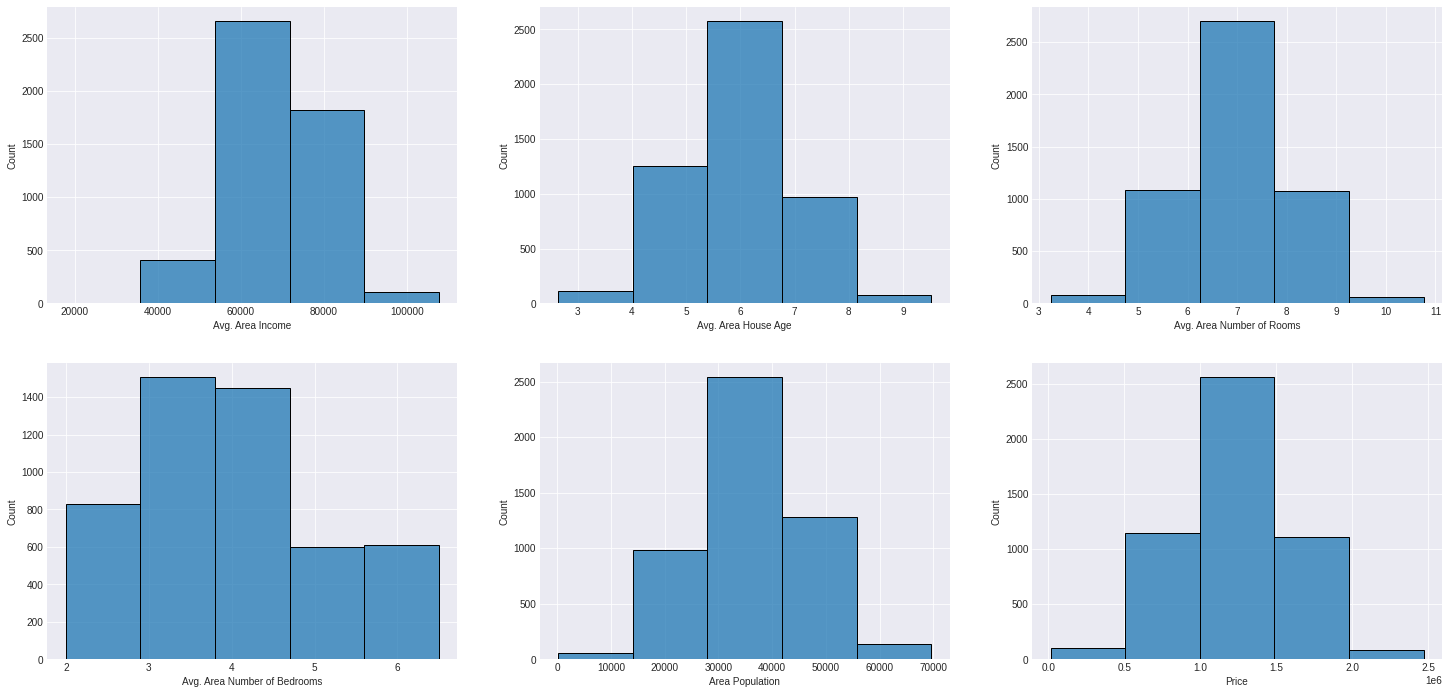

In [82]:
columns=df.columns
plt.style.use('seaborn-darkgrid')
_, axes = plt.subplots(2, 3, figsize=(25,12))
for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
  sns.histplot(x=df[column], ax=axes[x][y], bins=5)

In [83]:
# TO REMOVE WARNINGS USE THIS
import warnings
warnings.filterwarnings("ignore")

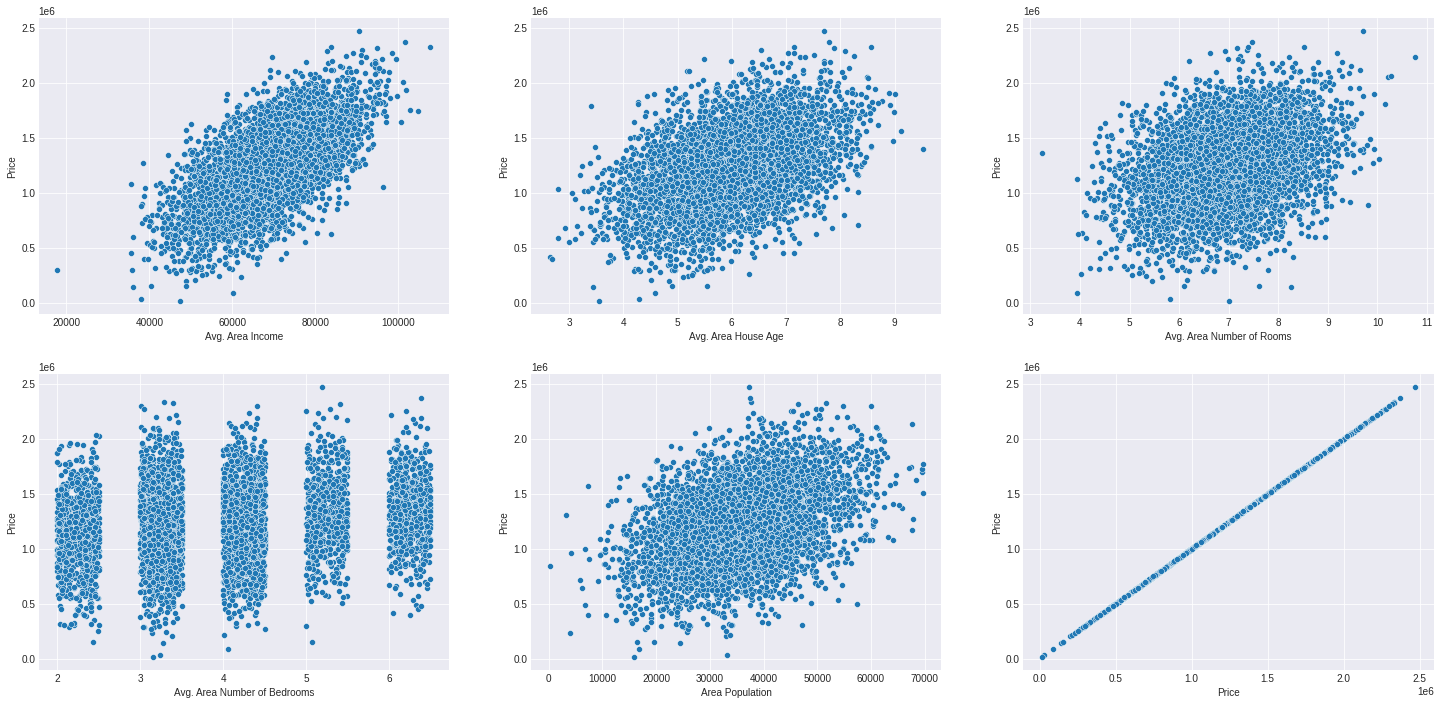

In [84]:
columns=df.columns
plt.style.use('seaborn-darkgrid')
_, axes = plt.subplots(2, 3, figsize=(25,12))
for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
  sns.scatterplot(x=df[column],y=df['Price'],ax=axes[x][y])


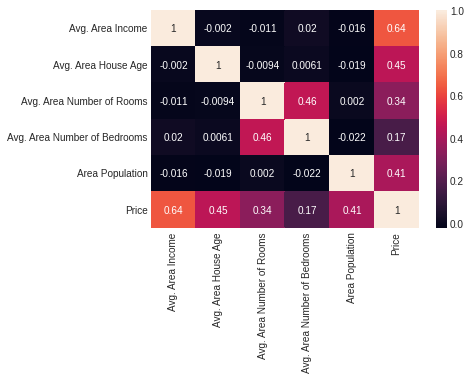

In [85]:
sns.heatmap(df.corr(), annot=True)

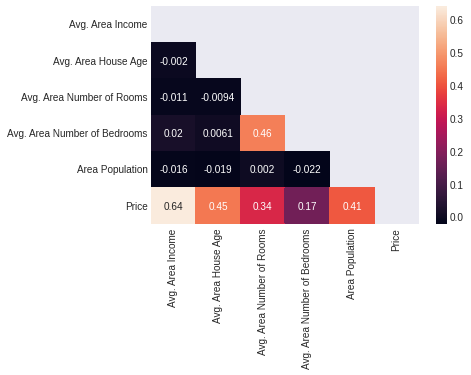

In [86]:
# HOW TO REMOVE THE REPEATING PORTION OF THE HEATMAP
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

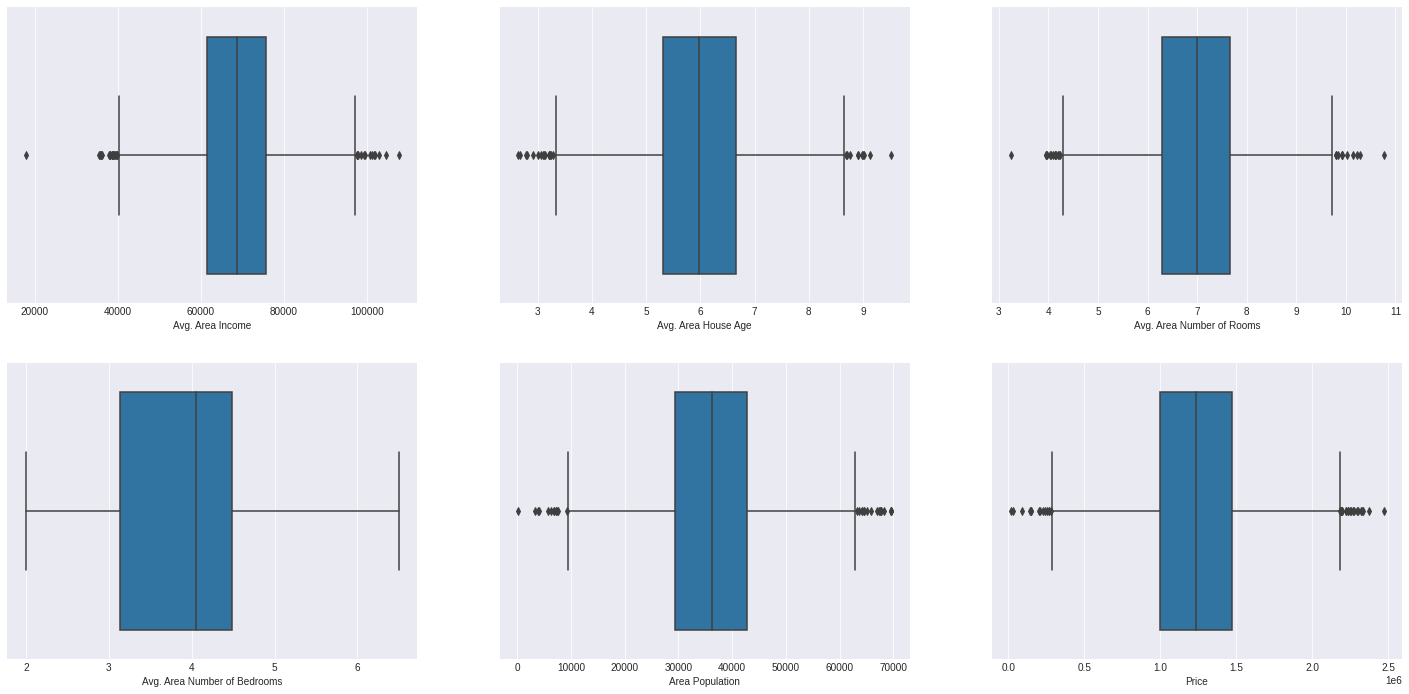

In [87]:
columns=df.columns
plt.style.use('seaborn-darkgrid')
_, axes = plt.subplots(2, 3, figsize=(25,12))
for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
  sns.boxplot(df[column], ax=axes[x][y])

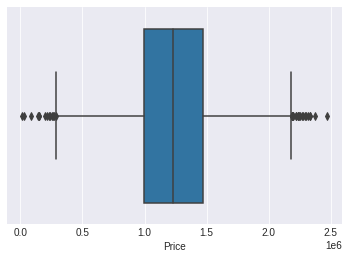

In [88]:
column=df['Price']
q3=column.quantile(0.75)
q1=column.quantile(0.25)
iqr=q3-q1
lb=q1-0.5*iqr
ub=q3+0.5*iqr
filter = (column>=lb) & (column<=ub)
df=df[filter]
sns.boxplot(x=column)
plt.show()

In [89]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.datasets import make_regression

from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import GammaRegressor

from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import MultiTaskLassoCV

# Bayesian Regression
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lars
from sklearn.linear_model import LarsCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

# Regression Metrics 
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score 
models = [
    # BayesianRidge,
    # ElasticNet,
    # ElasticNetCV, 
    # Lars, 
    # LarsCV, 
    # Lasso, 
    # LassoCV, 
    # LassoLars, 
    # LassoLarsCV, 
    # LassoLarsIC, 
    # OrthogonalMatchingPursuit,
    # OrthogonalMatchingPursuitCV, 
    LinearRegression, 
    Ridge,
    # RidgeCV,  
    # VotingRegressor,
    # StackingRegressor, 
    GradientBoostingRegressor, 
    ExtraTreesRegressor,
    # BaggingRegressor, 
    # AdaBoostRegressor, 
    # KNeighborsRegressor,
    # RadiusNeighborsRegressor, 
    # DummyRegressor, 
    # MLPRegressor,
    # LinearSVR, 
    NuSVR, 
    SVR, 
    # DecisionTreeRegressor, 
    # ExtraTreeRegressor
    ]

# IsotonicRegression, RandomForestRegressor, HistGradientBoostingRegressor, GaussianProcessRegressor, KernelRidge, SGDRegressor, ARDRegression,
metrics = []
model_names=[]
for model in models:
  m=model()
  m.fit(X_train,y_train) 
  y_test_pred = m.predict(X_test)
  model_names.append(model.__name__)
  metrics.append(mae(y_test, y_test_pred))
  print('------------------------------------------------------------------------------------------------------------')
  print('------------------------------------------------------------------------------------------------------------') 
  print(model.__name__)


# Combining the Model Name and Accuracy in a dataframe
# Here Model_Names and Accuracy Both are lists
# acc=pd.DataFrame(list(zip(model_names,accuracy)),columns=['Name','Accuracy'])
acc=pd.DataFrame({'Name':model_names, 'MAE':metrics})

# Arranging the dataframe by the models with the highest accuracy to lowest accuracy
acc=acc.sort_values(by='MAE',ascending=False).reset_index(drop=True)
acc.index = acc.index + 1
acc

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
LinearRegression
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
Ridge
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
GradientBoostingRegressor
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
ExtraTreesRegressor
-----------------------------------------------------------

,Name,MAE
1,NuSVR,281718.706414
2,SVR,281681.483260
3,ExtraTreesRegressor,92300.105475
4,GradientBoostingRegressor,89636.720492
5,LinearRegression,81257.557959
6,Ridge,81255.502140


In [90]:
# X_train = train.drop(['SalePrice'],axis=1)
# y_train = train['SalePrice']
# X_test = test.drop(['SalePrice'],axis=1)
# y_test = test['SalePrice']

In [91]:
# pd.DataFrame()
# df = X_train.isnull().sum()
# .sort_values(ascending=False).head(50)
# df=df[df>0].sort_values(ascending=False)

In [92]:
# df=pd.DataFrame(df)
# df1=df.transpose()
# df1.info()